In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0.0,0.0,2,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,NaN,2.0,NaN,2,2,...,NaN,0,0.0,2,NaN,NaN,NaN,2,NaN,7
4,2,2,1,0,0,0.0,2.0,0.0,2,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,NaN,0.0,NaN,3,2,...,NaN,0,0.0,0,NaN,NaN,NaN,1,NaN,70
355,2,2,2,1,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,NaN,0.0,NaN,0,0,...,NaN,0,NaN,0,0.0,0.0,NaN,1,NaN,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	73
float64		column 7	18
float64		column 8	73
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	73
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
int64		column 20	0
int64		column 21	0
float64		column 22	37
int64		column 23	0
int64		column 24	0
float64		column 25	73
int64		column 26	0
float64		column 27	37
int64		column 28	0
float64		column 29	55
float64		column 30	36
float64		column 31	55
int64		column 32	0
float64		column 33	54
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,285.000000,340.000000,285.000000,358.000000,358.000000,...,285.000000,358.000000,321.000000,358.000000,303.000000,322.000000,303.000000,358.000000,304.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.480702,0.167647,0.396491,0.622905,0.530726,...,0.421053,0.474860,0.489097,0.949721,0.452145,0.086957,0.115512,1.877095,0.582237,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.991414,0.568194,0.852082,0.990278,0.912352,...,0.871040,0.871705,0.978219,1.129060,0.950873,0.408497,0.498199,0.699324,1.128602,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

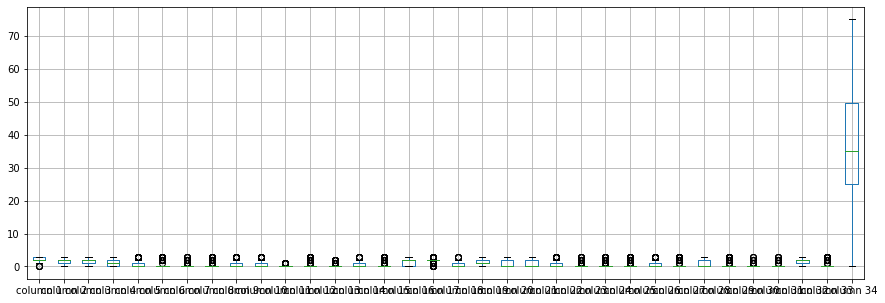

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.480702
column 7      0.167647
column 8      0.396491
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.428070
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.662011
column 21     0.983240
column 22     0.635514
column 23     0.298883
column 24     0.368715
column 25     0.421053
column 26     0.474860
column 27     0.489097
column 28     0.949721
column 29     0.452145
column 30     0.086957
column 31     0.115512
column 32     1.877095
column 33     0.582237
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.035540,-0.141431,-0.021278,0.138519,0.180740,...,-0.011782,0.153229,-0.001087,0.038837,-0.012691,-0.032662,0.004472,0.093026,-0.007058,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.050914,-0.110537,-0.072381,0.294258,0.295932,...,-0.081110,0.205046,-0.096690,0.023095,-0.087955,-0.041271,-0.036420,-0.008453,-0.131501,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.373172,-0.184419,0.312249,0.301187,0.261495,...,0.319392,0.350007,0.329562,-0.252643,0.298903,-0.104224,-0.150398,0.124812,0.285010,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.421217,-0.139466,0.368131,-0.296824,-0.152562,...,0.383163,-0.190548,0.401062,0.003028,0.376058,-0.162630,-0.197259,0.051553,0.388783,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.384689,-0.171307,0.358717,-0.065438,0.013496,...,0.391419,0.002588,0.383130,0.006726,0.374337,-0.132572,-0.166714,0.110295,0.358270,0.081162
column 6,0.035540,-0.050914,0.373172,0.421217,0.384689,1.000000,-0.144967,0.873985,-0.274183,-0.269145,...,0.902404,-0.172333,0.928335,0.070351,0.897718,-0.087450,-0.109725,0.234224,0.905566,0.113540
column 7,-0.141431,-0.110537,-0.184419,-0.139466,-0.171307,-0.144967,1.000000,-0.139123,0.228958,-0.000050,...,-0.123511,-0.160657,-0.155638,-0.027479,-0.137503,0.735858,0.839426,-0.097666,-0.136949,-0.364711
column 8,-0.021278,-0.072381,0.312249,0.368131,0.358717,0.873985,-0.139123,1.000000,-0.283720,-0.265665,...,0.884417,-0.166077,0.896766,0.122437,0.875623,-0.070837,-0.105302,0.246512,0.883582,0.127229
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.274183,0.228958,-0.283720,1.000000,0.659286,...,-0.266250,0.480594,-0.293774,-0.417851,-0.271271,0.215326,0.252611,-0.079246,-0.271394,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.269145,-0.000050,-0.265665,0.659286,1.000000,...,-0.267242,0.485260,-0.267564,-0.425421,-0.264252,-0.063721,-0.025997,0.027887,-0.256424,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+34,34+34+34,34+34+34+34,34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34,34+34+34+34,34+34+34,34+34,34], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.16688121448864
Epoch: 1 , loss: 74.70767073197798
Epoch: 2 , loss: 75.30406154285778
Epoch: 3 , loss: 74.9017351323908
Epoch: 4 , loss: 74.93358126553622
Epoch: 5 , loss: 74.28709827769886
Epoch: 6 , loss: 72.00875507701527
Epoch: 7 , loss: 70.14269308610396
Epoch: 8 , loss: 69.2980745488947
Epoch: 9 , loss: 68.52702973105691
Epoch: 10 , loss: 67.6591848893599
Epoch: 11 , loss: 67.53976388411088
Epoch: 12 , loss: 66.90129245411266
Epoch: 13 , loss: 66.41367149353027
Epoch: 14 , loss: 66.22193145751953
Epoch: 15 , loss: 65.91178131103516
Epoch: 16 , loss: 65.54925693165173
Epoch: 17 , loss: 65.65434958718039
Epoch: 18 , loss: 65.26932508295232
Epoch: 19 , loss: 64.83902237632059
Epoch: 20 , loss: 64.52885280955921
Epoch: 21 , loss: 64.7917721488259
Epoch: 22 , loss: 64.0086279782382
Epoch: 23 , loss: 64.03356344049627
Epoch: 24 , loss: 64.01089356162332
Epoch: 25 , loss: 63.79461617903276
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0
1,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0
2,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0
3,0,0,0,0,0,0.276025,0.0,0.272264,0,0,...,0.266685,0,0.00000,0,0.254280,-2.010377,-2.051145,0,0.321828,0
4,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0,0.143072,0.0,0.141339,0,0,...,0.118934,0,0.00000,0,0.143518,-0.020554,-0.063691,0,0.185779,0
355,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,0.000000,0
356,0,0,0,0,0,0.178825,0.0,0.183628,0,0,...,0.165954,0,0.18214,0,0.000000,0.000000,-0.028969,0,0.222099,0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(20.67796335399717, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.02727702407008446

In [27]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.294130
column 7      0.000000
column 8      0.270494
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.260209
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.263853
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.277138
column 30    -0.026724
column 31    -0.078675
column 32     2.000000
column 33     0.303700
column 34    22.000000
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.000000,0.0,0.000000,2,2,...,0.000000,0,0.00000,0,0.000000,0.000000,0.000000,0,2.000000,0
1,1,1,2,0,0,0.000000,3.0,0.000000,3,0,...,0.000000,0,0.00000,0,0.000000,2.000000,2.000000,2,0.000000,7
2,2,2,1,0,0,0.000000,3.0,0.000000,2,0,...,0.000000,0,0.00000,2,0.000000,3.000000,3.000000,2,0.000000,7
3,2,2,2,1,0,0.276025,2.0,0.272264,2,2,...,0.266685,0,0.00000,2,0.254280,-0.010377,-0.051145,2,0.321828,7
4,2,2,1,0,0,0.000000,2.0,0.000000,2,0,...,0.000000,0,0.00000,3,0.000000,2.000000,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,3,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0,0.143072,0.0,0.141339,3,2,...,0.118934,0,0.00000,0,0.143518,-0.020554,-0.063691,1,0.185779,70
355,2,2,2,1,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.00000,2,0.000000,0.000000,0.000000,2,0.000000,70
356,2,1,0,3,0,0.178825,0.0,0.183628,0,0,...,0.165954,0,0.18214,0,0.000000,0.000000,-0.028969,1,0.222099,70


In [29]:
imputations[-1].to_excel("DERM_AE_5(imp).xlsx", index=False, header=False)